In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import ast
from collections import defaultdict
from tqdm import tqdm

In [19]:
# Set the path to the directory containing the subfolders
parent_directory = './runs'

# This list will hold all the numbers found
successes = {}
times = {}
args = {}
# Regular expression to find numbers
number_pattern = re.compile(r'\d+')
all_files = list(os.walk(parent_directory))
for root, dirs, files in tqdm(all_files):
    for file in files:
        if file.endswith(".log"):  # Checks if the file is a log file
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                args[file] = ast.literal_eval(lines[1])
                # print(float(file_path.split("--")[1].split("/")[0].replace("-", ".")))
                time = float(file_path.split("--")[1].split("/")[0].replace("-", "."))
                
                
                
                for i, line in enumerate(lines):
                    if line.startswith("Solved:"):
                        if(args[file]["adaptive_n"]):
                            print(line)
                        successes[file] = int(("True" in lines[i].strip()))

                        if (args[file]["adaptive_n"] and not successes[file]):
                            print(file_path)
                    if(line.startswith("Time:")):
                        # print(file_path)
                        times[file] = float(lines[i].strip().replace("Time: ", ""))
           


 49%|████▉     | 790/1598 [00:00<00:00, 3978.74it/s]

IISDFD
Solved: True

IISDFD
Solved: False

./runs/prm-1--20240610-111700/1718032627.7308805/1718032627.7339935.log
IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: False

./runs/prm-1--20240610-153224/1718047951.1669958/1718047951.1684213.log
IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: False

./runs/prm-1--20240610-131605/1718039771.816492/1718039771.817103.log
IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True



 74%|███████▍  | 1188/1598 [00:00<00:00, 3550.23it/s]

IISDFD
Solved: False

./runs/prm-1--20240610-111704/1718032639.2752044/1718032639.282564.log
IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: False

./runs/prm-1--20240610-171148/1718053915.1706476/1718053915.1723065.log
IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True



100%|██████████| 1598/1598 [00:00<00:00, 3208.53it/s]

IISDFD
Solved: False

./runs/prm-1--20240610-194739/1718063266.0374649/1718063266.0386848.log
IISDFD
Solved: False

./runs/prm-1--20240610-194739/1718063266.117243/1718063266.1181242.log
IISDFD
Solved: True

IISDFD
Solved: True

IISDFD
Solved: True



In [20]:
print(len(times))
print(len(successes))
print(len(args))

plot_points = {}
plot_successes = defaultdict(list)
plot_times = defaultdict(list)
counter = 0
print(args.keys())
for key in times:
    if(args[key]["adaptive_n"]):
        counter += 1
    plot_successes[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(successes[key])
    plot_times[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(times[key])

1402
1402
1497
dict_keys(['1718068555.247606.log', '1718039756.906867.log', '1718039756.7138646.log', '1718039756.9403758.log', '1718039756.8082898.log', '1718039756.7136393.log', '1718068529.3048494.log', '1718036746.5450947.log', '1718036746.5493577.log', '1718036746.7522082.log', '1718036746.7295828.log', '1718036746.7293525.log', '1718036746.973554.log', '1718036746.7683597.log', '1718036747.067.log', '1718036746.7138329.log', '1718036746.6142173.log', '1718036746.5469985.log', '1718059962.53189.log', '1718059962.0655007.log', '1718059962.6804147.log', '1718059962.2367885.log', '1718059962.4281554.log', '1718059962.4675956.log', '1718059962.344391.log', '1718059962.3697178.log', '1718059962.3546746.log', '1718059962.3627527.log', '1718059962.1142607.log', '1718059962.1962197.log', '1718059962.0623527.log', '1718059962.1957777.log', '1718059962.4362822.log', '1718059962.7215781.log', '1718059962.3018117.log', '1718032627.733004.log', '1718032627.7318962.log', '1718032627.7320673.log

36


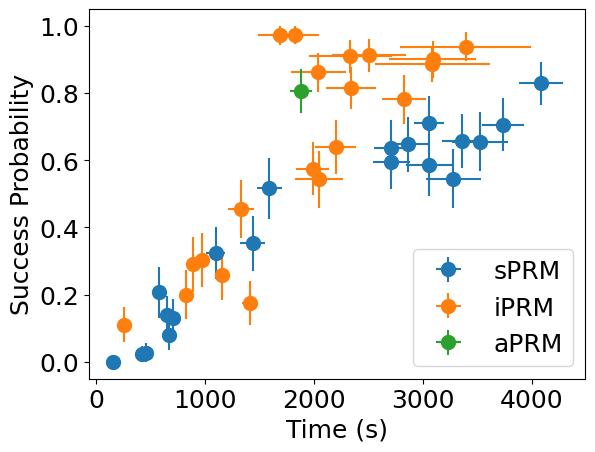

In [21]:

plt.rcParams.update({'font.size': 18})
plt.figure()
legend = ["sPRM", "iPRM", "aPRM"]
# Plot the sPRM results
for condition in legend:
    xs = []
    ys = []
    x_errs = []
    y_errs = []
    ns = []
    for k in plot_successes:
        min_samples, max_samples, adaptive_n = k
        
        if((condition == "iPRM" and (min_samples != max_samples-1 and not adaptive_n)) or
           (condition == "sPRM" and (min_samples == max_samples-1 and not adaptive_n)) or
           (condition == "aPRM" and (adaptive_n))):
            if(condition == "aPRM"):
                print(len(plot_times[k]))
            xs.append(np.mean(plot_times[k]))
            ys.append(np.mean(plot_successes[k]))
            x_errs.append(np.std(plot_times[k])/np.sqrt(len(plot_times[k])))
            y_errs.append(np.std(plot_successes[k])/np.sqrt(len(plot_successes[k])))
            ns.append(max_samples)

    plt.errorbar(xs, ys, xerr=x_errs, yerr=y_errs, markersize=10, fmt='o')

plt.legend(legend, loc="lower right")
plt.ylabel("Success Probability")
plt.xlabel("Time (s)")
plt.savefig('../../../figures/sample_plot.pdf', format='pdf',  bbox_inches='tight')